In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression

df=pd.read_excel('./Online_Retail.xlsx', sheet_name = 'Online Retail')
df.head()
# reading the data file (excel) and display the first 5 rows with the head() command

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [106]:
year_df = df[df['InvoiceDate'] < pd.Timestamp('2011-12-01')]
year_df.head()
# selecting records for only 1 year from 2010-12-01 to 2011-12-01 for standardisation and compare like with like

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [107]:
year_df.isna().sum()
#  check how many null cells there are in the data frame

InvoiceNo           0
StockCode           0
Description      1439
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     127216
Country             0
dtype: int64

In [108]:
year_df['CustomerID']=year_df['CustomerID'].fillna(99999)
year_df['CustomerID']=year_df['CustomerID'].astype(int)
year_df.head()
# fill Customer ID of empty fields with 99999 and treat them as integer so they do not display .0 


C:\Users\laval.liu.RHOL\AppData\Local\Temp\ipykernel_18000\1346493452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['CustomerID']=year_df['CustomerID'].fillna(99999)
C:\Users\laval.liu.RHOL\AppData\Local\Temp\ipykernel_18000\1346493452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['CustomerID']=year_df['CustomerID'].astype(int)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [122]:
year_df['Tot_amount'] = year_df['Quantity'] * year_df['UnitPrice']
year_df.head()
# create an additional column 'Tot_amount' which is the product of columns 'Quantity' and 'UnitPrice'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Tot_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [110]:
# data cleansing by removing below
# stock code = S for samples
# stock code = B for Adjust bad debts
# stock code = C2 for carriage
# description = throw away
# description = unsaleable, destroyed
# description = damages
# unit price = 0

# I kept stock code M = Manual (not sure what Manual means though)
year_df = year_df.drop(year_df[(year_df['StockCode'] == 'S') | (year_df['UnitPrice'] == 0) | (year_df['StockCode'] == 'throw away') | (year_df['StockCode'] == 'C2') | (year_df['StockCode'] == 'damages') | (year_df['StockCode'] == 'B')].index)
year_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Tot_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [111]:
year_df.isna().sum()
# checking for empty cells after data preparation

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Tot_amount     0
dtype: int64

In [112]:
df2=year_df[['InvoiceDate', 'Tot_amount']]
df2.head()
# df2 will be based on total amount (quantity x unit price) by Invoice Date

,InvoiceDate,Tot_amount
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34


In [113]:
df2['InvoiceDate'].min(), df2['InvoiceDate'].max()
# checking the minimum and the maximum invoice date on which to base our analysis

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-11-30 17:42:00'))

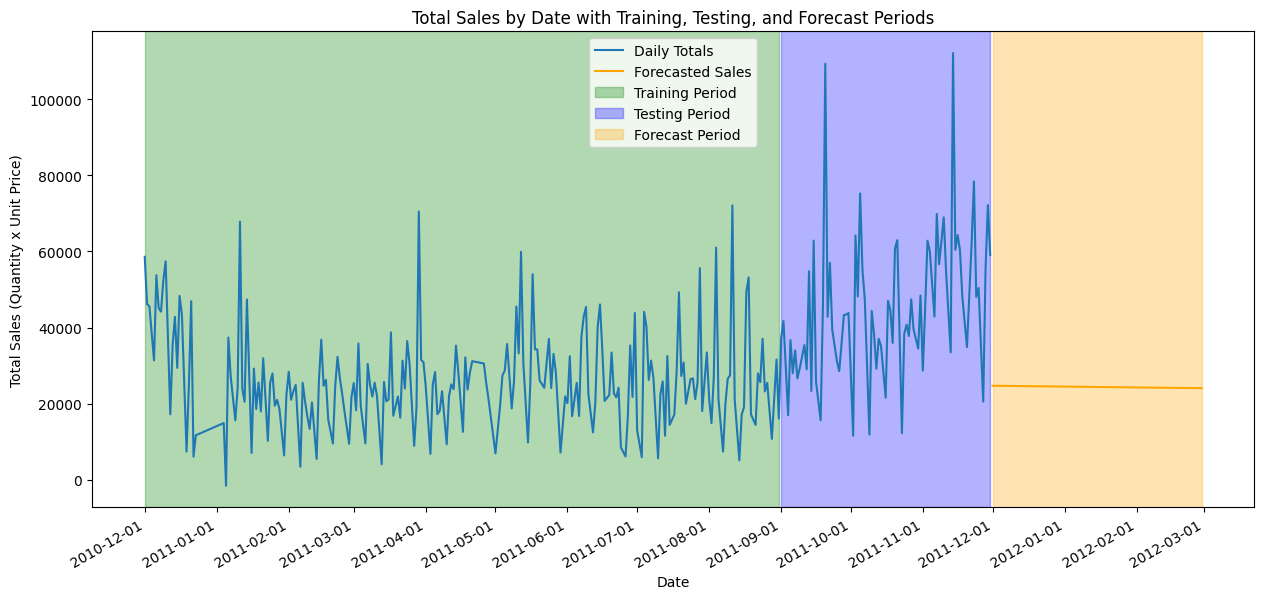

In [114]:
# Your initial data processing
df2.loc[:, 'InvoiceDate'] = pd.to_datetime(df2.loc[:, 'InvoiceDate']).dt.normalize()
daily_totals = df2.groupby('InvoiceDate')['Tot_amount'].sum().reset_index()
daily_totals.set_index('InvoiceDate', inplace=True)
daily_totals.sort_index(inplace=True)

# Convert index to numerical format for regression model
daily_totals['Date_Num'] = daily_totals.index.map(mdates.date2num)

# Define training period with the first 9 months and then test for following 3 months (ratio 3:1)
train_start = pd.to_datetime('2010-12-01')
train_end = pd.to_datetime('2011-08-31')

# Create a copy of the training data to avoid SettingWithCopyWarning
train_data = daily_totals.loc[train_start:train_end].copy()

# Split your data into training and testing sets
X = daily_totals[['Date_Num']]
Y = daily_totals['Tot_amount']
X_train = train_data[['Date_Num']].to_numpy()
y_train = train_data['Tot_amount'].to_numpy()

# Define testing period the 3 following months (using the ratio 3:1)
test_start = pd.to_datetime('2011-09-01')
test_end = pd.to_datetime('2011-11-30')
test_data = daily_totals.loc[test_start:test_end]
X_test = test_data[['Date_Num']]
y_test = test_data['Tot_amount']

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future sales for the next 3 months
forecast_start = pd.to_datetime('2011-12-01')
forecast_end = pd.to_datetime('2012-02-29')
future_dates = pd.date_range(start=forecast_start, end=forecast_end)
future_dates_num = mdates.date2num(future_dates)
future_predictions = model.predict(future_dates_num.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(15, 7))
plt.plot(daily_totals.index, daily_totals['Tot_amount'], linestyle='-', label='Daily Totals')
plt.plot(future_dates, future_predictions, linestyle='-', color='orange', label='Forecasted Sales')
plt.axvspan(train_start, train_end, color='green', alpha=0.3, label='Training Period')
plt.axvspan(test_start, test_end, color='blue', alpha=0.3, label='Testing Period')
plt.axvspan(forecast_start, forecast_end, color='orange', alpha=0.3, label='Forecast Period')

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.title('Total Sales by Date with Training, Testing, and Forecast Periods')
plt.xlabel('Date')
plt.ylabel('Total Sales (Quantity x Unit Price)')
plt.legend()
plt.show()

In [115]:
# total sales per month
year_df.groupby(year_df.InvoiceDate.dt.month)['Tot_amount'].sum()

InvoiceDate
1      559850.260
2      498666.070
3      682633.920
4      492777.121
5      723317.060
6      691213.630
7      680750.111
8      694141.770
9     1018787.622
10    1070155.710
11    1460690.130
12     748421.970
Name: Tot_amount, dtype: float64

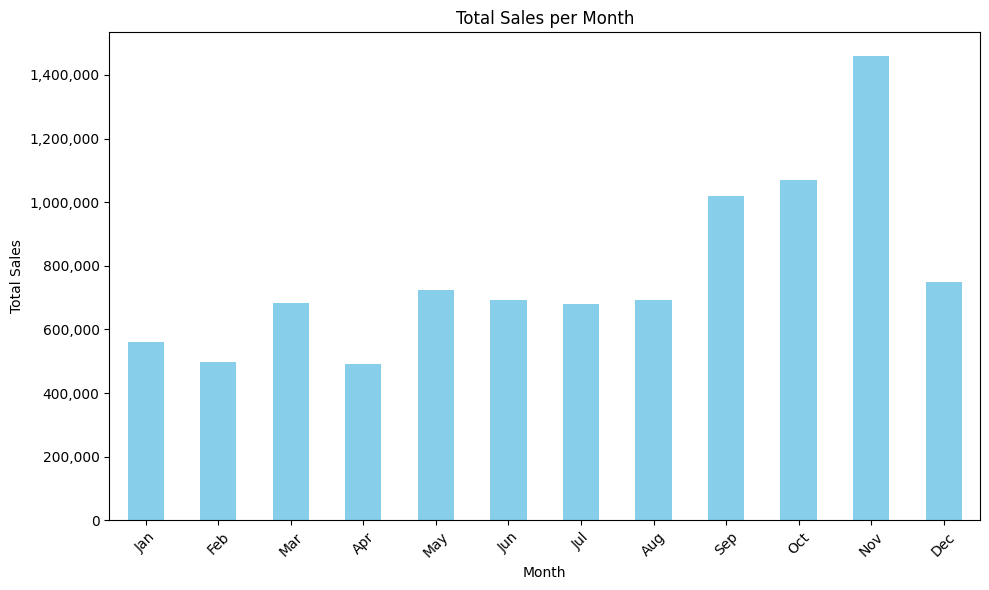

In [116]:
# graph of total sales by Month
monthly_totals = year_df.groupby(year_df.InvoiceDate.dt.month)['Tot_amount'].sum()
monthly_totals.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

#set y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [117]:
# total sales by country
year_df.groupby('Country')['Tot_amount'].sum()

Country
Australia                137077.270
Austria                    9471.120
Bahrain                     548.400
Belgium                   39501.530
Brazil                     1143.600
Canada                     3666.380
Channel Islands           19742.140
Cyprus                    13037.540
Czech Republic              707.720
Denmark                   18599.240
EIRE                     250978.780
European Community         1291.750
Finland                   21096.060
France                   190169.070
Germany                  213893.510
Greece                     4029.530
Hong Kong                 10117.040
Iceland                    4085.180
Israel                     7907.820
Italy                     16690.060
Japan                     35457.550
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2536.280
Netherlands              272933.520
Norway                    32377.760
Poland                     7213.140
Portugal            

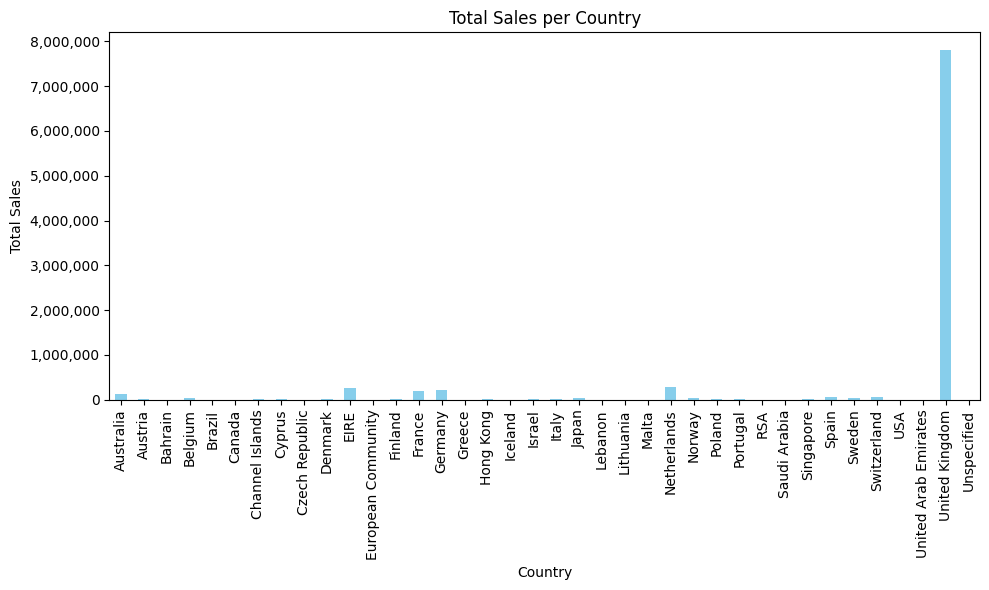

In [118]:
# graph of total sales by country
country_totals = year_df.groupby('Country')['Tot_amount'].sum()
country_totals.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Total Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')

#set y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [119]:
df_orders = year_df.groupby('InvoiceNo').agg(
        TotalValue=('Tot_amount', 'sum'),
        StockCodes=('StockCode', 'nunique'),
        items=('Quantity', 'sum')
)
df_orders.head()
# total sales by Invoice No, the total number of items per Invoice No and the Total number of unique items per Invoice No

,TotalValue,StockCodes,items
InvoiceNo,,,
536365,139.12,7,40.0
536366,22.20,2,12.0
536367,278.73,12,83.0
536368,70.05,4,15.0
536369,17.85,1,3.0


In [120]:
df_StockCode = year_df.groupby(['StockCode', 'Description']).agg(
        TotalValue=('Tot_amount', 'sum'),
        items=('Quantity', 'sum')
)
df_StockCode.head()
# total sales by Stock Code with the Description, the total number of items per Stock Code 

,,TotalValue,items
StockCode,Description,,
10002,INFLATABLE POLITICAL GLOBE,759.89,860.0
10080,GROOVY CACTUS INFLATABLE,119.09,303.0
10120,DOGGY RUBBER,39.27,187.0
10125,MINI FUNKY DESIGN TAPES,972.74,1270.0
10133,COLOURING PENCILS BROWN TUBE,1540.02,2857.0


In [121]:
df_TotSalesCustomer = year_df.groupby('CustomerID').agg(
        TotalValue=('Tot_amount', 'sum'),
        StockCodes=('StockCode', 'nunique'),
        items=('Quantity', 'sum')
)
df_TotSalesCustomer.head()
# total sales per customer, with the total number of items they purchased and the number of unique items they purchased

,TotalValue,StockCodes,items
CustomerID,,,
12346,0.00,1,0.0
12347,4085.18,100,2266.0
12348,1797.24,22,2341.0
12349,1757.55,73,631.0
12350,334.40,17,197.0
